### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]

loja1.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
def faturamento (lista):
  faturamento = {index: loja['Preço'].sum() for index, loja in enumerate(lojas)}
  faturamento = pd.Series(faturamento)
  faturamento = faturamento.to_frame(name='Faturamento').reset_index()
  return(faturamento)

faturamentos = faturamento(lojas)

print(faturamentos)

   index  Faturamento
0      0   1534509.12
1      1   1488459.06
2      2   1464025.03
3      3   1384497.58


# 2. Vendas por Categoria

In [4]:
def vendas_categoria (lista):
  df_vendas_categoria = []
  for l, r in zip(lista, range(1,5)):
    vendas_categoria = l['Categoria do Produto'].value_counts().head(5)
    vendas_categoria = pd.Series(vendas_categoria)
    vendas_categoria = vendas_categoria.to_frame(name='Vendas por Categoria').reset_index()
    vendas_categoria['Loja'] = r
    df_vendas_categoria.append(vendas_categoria)

  df_vendas_categoria = pd.concat(df_vendas_categoria)
  return df_vendas_categoria

vendas_categorias = vendas_categoria(lojas)

display(vendas_categorias)

,Categoria do Produto,Vendas por Categoria,Loja
0,moveis,465,1
1,eletronicos,448,1
2,brinquedos,324,1
3,eletrodomesticos,312,1
4,esporte e lazer,284,1
0,moveis,442,2
1,eletronicos,422,2
2,brinquedos,313,2
3,eletrodomesticos,305,2
4,esporte e lazer,275,2


# 3. Média de Avaliação das Lojas


In [5]:
def avaliacoes (lista):
  avaliacao_lojas = {index: loja['Avaliação da compra'].mean() for index, loja in enumerate(lojas)}
  avaliacao_lojas = pd.Series(avaliacao_lojas)
  avaliacao_lojas = avaliacao_lojas.to_frame(name='Média de Avaliações')
  return avaliacao_lojas

avaliacoes_lojas = avaliacoes(lojas)
print(avaliacoes_lojas)

   Média de Avaliações
0             3.976685
1             4.037304
2             4.048326
3             3.995759


# 4. Produtos Mais e Menos Vendidos

In [6]:
def maior_venda (lista):
  df_mais_vendidos = []
  for l, r in zip(lista, range(1,5)):
    mais_vendidos = l['Produto'].value_counts().head(5)
    mais_vendidos = pd.Series(mais_vendidos)
    mais_vendidos = mais_vendidos.to_frame(name='5 Produtos mais vendidos')
    mais_vendidos['Loja'] = r
    df_mais_vendidos.append(mais_vendidos)

  df_mais_vendidos = pd.concat(df_mais_vendidos)
  return df_mais_vendidos

maiores_vendas = maior_venda(lojas)
print(maiores_vendas)

                          5 Produtos mais vendidos  Loja
Produto                                                 
Micro-ondas                                     60     1
TV Led UHD 4K                                   60     1
Guarda roupas                                   60     1
Secadora de roupas                              58     1
Cômoda                                          56     1
Iniciando em programação                        65     2
Micro-ondas                                     62     2
Bateria                                         61     2
Violão                                          58     2
Pandeiro                                        58     2
Kit banquetas                                   57     3
Mesa de jantar                                  56     3
Cama king                                       56     3
Jogo de panelas                                 55     3
Cômoda                                          55     3
Cama box                       

In [7]:
def menor_venda (lista):
  df_menos_vendidos = []
  for l, r in zip(lista, range(1,5)):
    menos_vendidos = l['Produto'].value_counts().tail(5)
    menos_vendidos = pd.Series(menos_vendidos)
    menos_vendidos = menos_vendidos.to_frame(name='5 Produtos mais vendidos')
    menos_vendidos['Loja'] = r
    df_menos_vendidos.append(menos_vendidos)

  df_menos_vendidos = pd.concat(df_menos_vendidos)
  return df_menos_vendidos

menores_vendas = menor_venda(lojas)
print(menores_vendas)

                             5 Produtos mais vendidos  Loja
Produto                                                    
Ciência de dados com python                        39     1
Pandeiro                                           36     1
Panela de pressão                                  35     1
Headset                                            33     1
Celular ABXY                                       33     1
Fone de ouvido                                     37     2
Poltrona                                           35     2
Mesa de jantar                                     34     2
Impressora                                         34     2
Jogo de tabuleiro                                  32     2
Guitarra                                           38     3
Jogo de copos                                      36     3
Mochila                                            36     3
Micro-ondas                                        36     3
Blocos de montar                        

# 5. Frete Médio por Loja

In [8]:
def frete (lista):
  frete_medio = {index: loja['Frete'].mean() for index, loja in enumerate(lojas)}
  frete_medio = pd.Series(frete_medio)
  frete_medio = frete_medio.to_frame(name='Frete Médio')
  return frete_medio

fretes = frete(lojas)
print(fretes)

   Frete Médio
0    34.691805
1    33.621941
2    33.074464
3    31.278997


# 6. Visualização

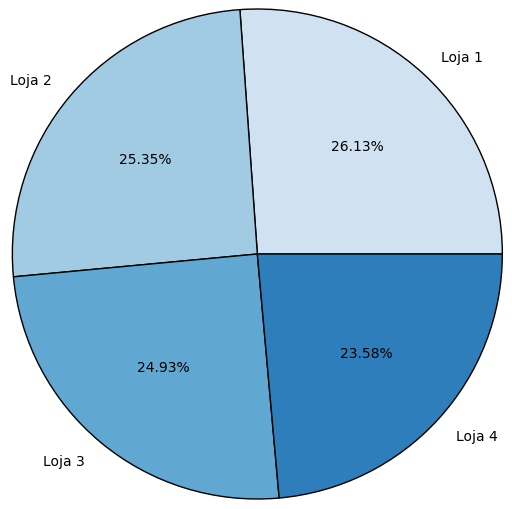

In [9]:
lojas_numero = []
for r in range(1,5):
  loja_numero = f'Loja {r}'
  lojas_numero.append(loja_numero)

plt.style.use('_mpl-gallery-nogrid')
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(faturamentos['Faturamento'], labels=lojas_numero, normalize=True, colors=colors, radius=10, center=(4, 4), autopct='%.2f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "black"})
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

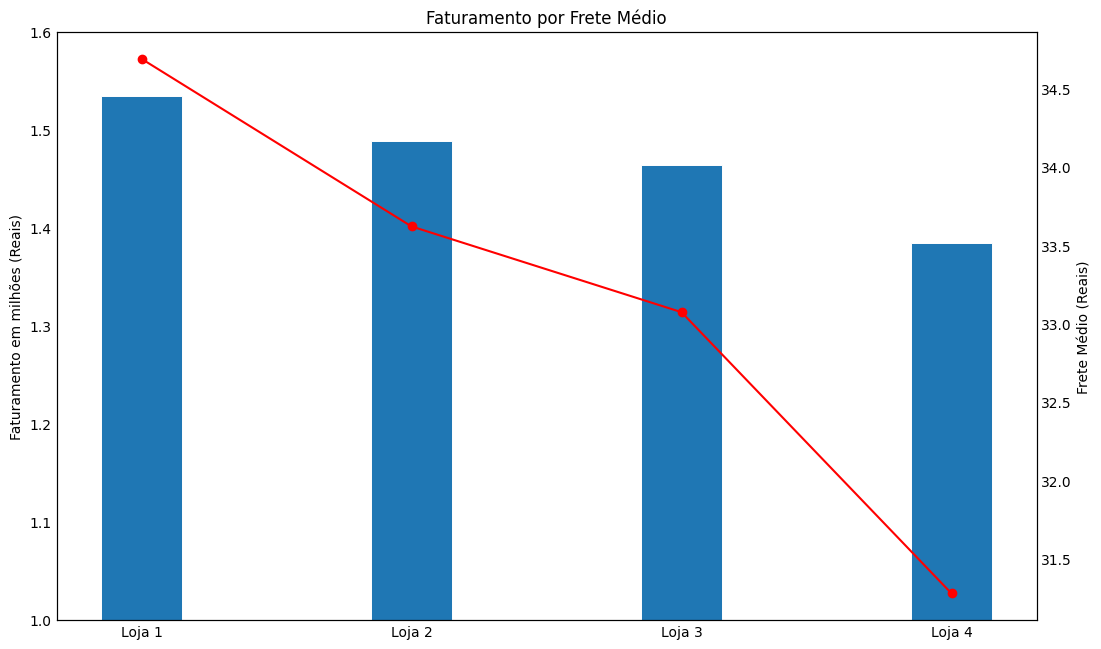

In [63]:
#Ideia era ver se a loja com menor frete era a com maior faturamento. Ou seja, se o cliente comprava na que tinha menor frete.

plt.style.use('_mpl-gallery')

x = lojas_numero
y = faturamentos['Faturamento'] / 1000000

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Faturamento por Frete Médio', ylabel='Faturamento em milhões (Reais)', ylim=(1,1.6))

ax2 = ax.twinx()

ax2.plot(lojas_numero, fretes['Frete Médio'], color='red', marker='o')
ax2.set_ylabel('Frete Médio (Reais)')
ax2.grid(visible = False)

plt.show()

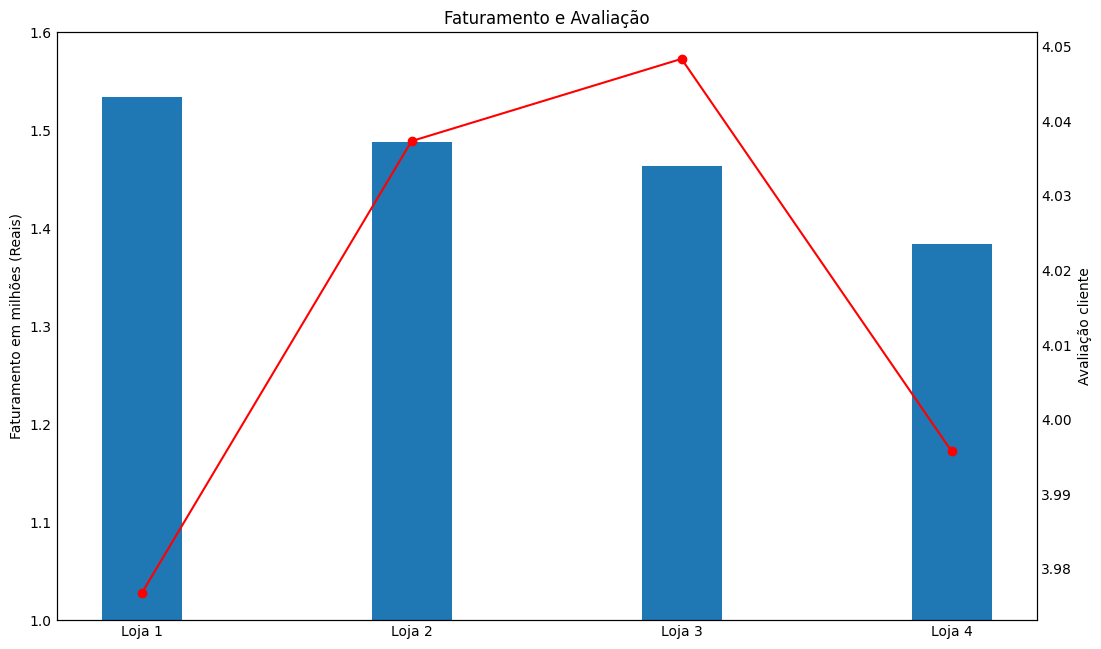

In [62]:
plt.style.use('_mpl-gallery')

x = lojas_numero
y = faturamentos['Faturamento'] / 1000000

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Faturamento e Avaliação', ylabel='Faturamento em milhões (Reais)', ylim=(1,1.6))

ax2 = ax.twinx()

ax2.plot(lojas_numero, avaliacoes_lojas['Média de Avaliações'], color='red', marker='o')
ax2.set(ylabel='Avaliação cliente')
ax2.grid(visible = False)

plt.show()

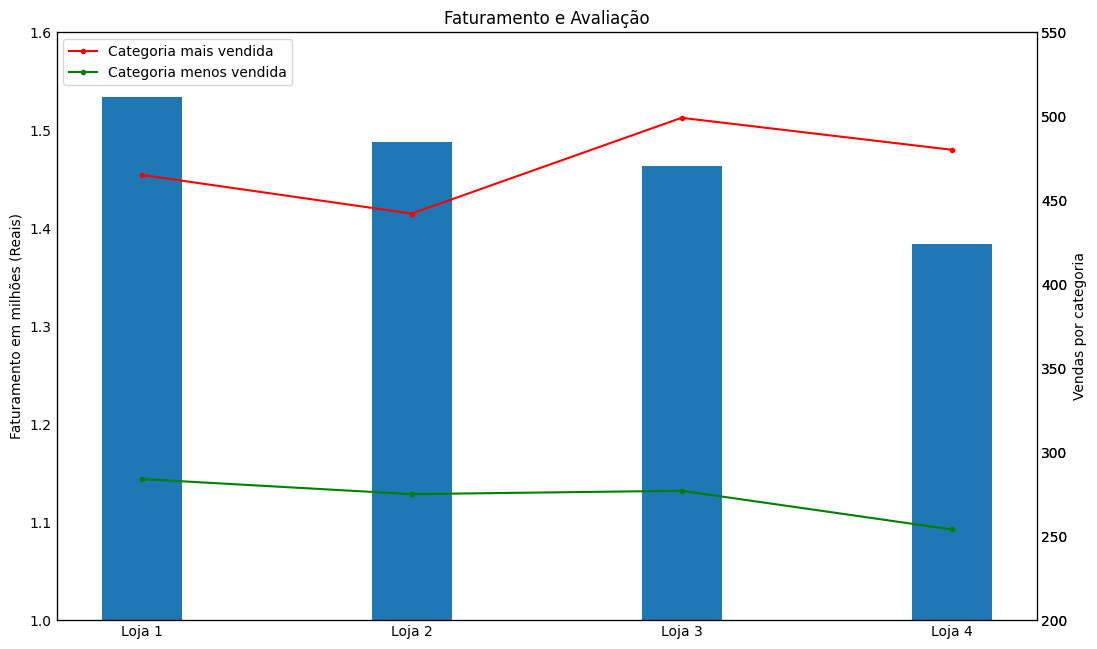

In [95]:
from matplotlib.lines import Line2D
from matplotlib import legend

plt.style.use('_mpl-gallery')

x = lojas_numero
y = faturamentos['Faturamento'] / 1000000

fig, ax = plt.subplots(figsize= (10, 6))

ax.bar(x, y, width=0.3, edgecolor="white", linewidth=0.7)
ax.grid(visible = False)
ax.set(title='Faturamento e Avaliação', ylabel='Faturamento em milhões (Reais)', ylim=(1,1.6))

ax2 = ax.twinx()
ax2.plot(lojas_numero, vendas_categorias.groupby('Loja')['Vendas por Categoria'].first(), color='red', marker='.', label='Categoria mais vendida')
ax2.set(ylabel='Vendas por categoria', ylim=(200,550))
ax2.grid(visible = False)

ax3 = ax.twinx()
ax3.plot(lojas_numero, vendas_categorias.groupby('Loja')['Vendas por Categoria'].last(), color='green', marker='.', label='Categoria menos vendida')
ax3.set(ylim=(200,550))
ax3.grid(visible = False)

handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()
all_handles = handles2 + handles3
all_labels = labels2 + labels3

# Criar a legenda usando os handles e labels combinados e plotar
plt.legend(all_handles, all_labels, loc='upper left')
plt.show()